In [ ]:
pip install ucimlrepo

In [ ]:
# prompt: do one hot encoding for the Sex Feature

from ucimlrepo import fetch_ucirepo
!pip install ucimlrepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
#print(abalone.metadata)

# variable information
#print(abalone.variables)

#X.head()
#y.head()
#y.describe()

#print(y['Rings'].nunique())

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'Sex' column
enc.fit(X[['Sex']])

# Transform the 'Sex' column into one-hot encoded features
encoded_sex = enc.transform(X[['Sex']]).toarray()

# Create a new DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_sex, columns=enc.get_feature_names_out(['Sex']))

# Concatenate the encoded features with the original DataFrame (excluding the original 'Sex' column)
X_encoded = pd.concat([X.drop('Sex', axis=1), encoded_df], axis=1)

# Now X_encoded contains the one-hot encoded 'Sex' feature
print(X_encoded.head())


   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150    0.0    0.0    1.0  
1         0.070    0.0    0.0    1.0  
2         0.210    1.0    0.0    0.0  
3         0.155    0.0    0.0    1.0  
4         0.055    0.0    1.0    0.0  


In [ ]:
X_encoded.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [ ]:
df = pd.concat([X_encoded, y], axis=1)

In [ ]:
import numpy as np
import pandas as pd

df = df[(np.abs(df - df.mean()) <= 3 * df.std()).all(axis=1)]

In [ ]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,0.310156,0.328284,0.361559,9.738763
std,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,0.462615,0.469647,0.480512,2.864691
min,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,0.000000,0.000000,0.000000,3.000000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,0.000000,0.000000,0.000000,8.000000
50%,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,0.000000,0.000000,0.000000,9.000000
75%,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,1.000000,1.000000,1.000000,11.000000
max,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,1.000000,1.000000,1.000000,19.000000


In [ ]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0,7


In [ ]:
#X is your features
#y is your target col

X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]   # Only the last column

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X = scaler.fit_transform(X_encoded)


X_scaled_df = pd.DataFrame(X, columns=X_encoded.columns)
# check the scaled data
print(X_scaled_df.describe())

             Length      Diameter        Height  Whole_weight  Shucked_weight  \
count  4.177000e+03  4.177000e+03  4.177000e+03  4.177000e+03    4.177000e+03   
mean  -5.834718e-16 -3.027929e-16  3.912493e-16  9.185853e-17   -1.020650e-17   
std    1.000120e+00  1.000120e+00  1.000120e+00  1.000120e+00    1.000120e+00   
min   -3.739154e+00 -3.556267e+00 -3.335953e+00 -1.686092e+00   -1.614731e+00   
25%   -6.161975e-01 -5.833158e-01 -5.862075e-01 -7.897577e-01   -7.811585e-01   
50%    1.749513e-01  1.725193e-01  1.156329e-02 -5.963767e-02   -1.052891e-01   
75%    7.579031e-01  7.267984e-01  6.093341e-01  6.613049e-01    6.426730e-01   
max    2.423480e+00  2.440025e+00  2.368329e+01  4.072271e+00    5.085388e+00   

       Viscera_weight  Shell_weight         Sex_F         Sex_I         Sex_M  
count    4.177000e+03  4.177000e+03  4.177000e+03  4.177000e+03  4.177000e+03  
mean     2.704723e-16  2.976897e-16 -4.252710e-17 -7.144552e-17  1.169495e-17  
std      1.000120e+00  1.00012

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam

# change y to dataframe and adjust align
y_df = pd.DataFrame(y)
X, y_df = X_encoded.align(y_df, join='inner', axis=0)
y = y_df.to_numpy().flatten()

# data scaling (MinMaxScaler)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# split data (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  MLP model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(1)  ])

# ✅ model compile
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])

# ✅ model train
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ✅ model predict
y_pred = model.predict(X_test).flatten()

# ✅ evaluate model (R² Score & MAE)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRegression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 100.2045 - mae: 9.5005 - val_loss: 98.7083 - val_mae: 9.5184
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 87.2016 - mae: 8.8728 - val_loss: 78.8255 - val_mae: 8.4130
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.5619 - mae: 7.9142 - val_loss: 54.7555 - val_mae: 6.8324
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 49.0312 - mae: 6.3619 - val_loss: 36.1263 - val_mae: 5.3165
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.6915 - mae: 4.6483 - val_loss: 21.0637 - val_mae: 3.7660
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.0082 - mae: 3.1637 - val_loss: 11.4192 - val_mae: 2.5722
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10.7562 - mae: 2.4584 - val_loss: 9.0832 - val_mae: 2.2279
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.5423 - mae: 2.2283 - val_loss: 8.1549 - val_mae: 2.1253
Epoch 9/100
101/101 ━━━━━━━━━━━━━

#Regrssion Plot

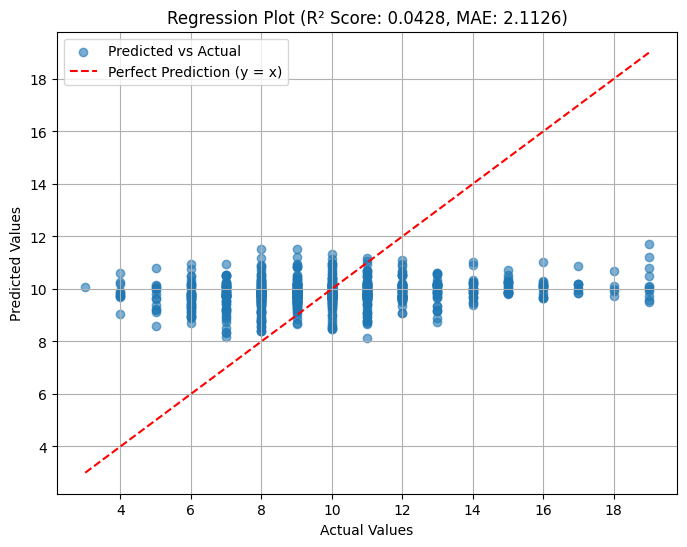


Regression Model Performance:
R² Score: 0.0428
Mean Absolute Error (MAE): 2.1126
Mean Squared Error (MSE): 7.7596
Root Mean Squared Error (RMSE): 2.7856
Root Mean Absolute Error (RMAE): 1.4535


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Additional evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
rmae = np.sqrt(mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


#  Visualization - predict vs actual (Regression Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="dashed", label="Perfect Prediction (y = x)")

# make a graph
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Regression Plot (R² Score: {r2:.4f}, MAE: {mae:.4f})")
plt.legend()
plt.grid(True)
plt.show()

print("\nRegression Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Root Mean Absolute Error (RMAE): {rmae:.4f}")



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np

# ✅ y를 숫자 벡터로 변환하여 다차원 문제 해결
y_df = pd.DataFrame(y)
X, y_df = X_encoded.align(y_df, join='inner', axis=0)
y = y_df.to_numpy().flatten()  # ✅ 벡터 변환

# 데이터 정규화 (MinMaxScaler → StandardScaler로 변경)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할 (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(X_train.shape[1],)),  # 입력층

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(1)  # ✅ 출력층: 1개의 연속된 값 (예측값)
])

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# ✅ 예측 및 성능 평가
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📌 Regression Model Performance:")
print(f"▶ Mean Absolute Error (MAE): {mae:.4f}")
print(f"▶ R² Score: {r2:.4f}")


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 102.8033 - mae: 9.7916 - val_loss: 94.6303 - val_mae: 9.2790
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 89.7511 - mae: 9.1639 - val_loss: 79.0307 - val_mae: 8.4256
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 65.6014 - mae: 7.7816 - val_loss: 49.9653 - val_mae: 6.5483
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 41.2601 - mae: 5.9868 - val_loss: 25.2257 - val_mae: 4.3164
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 20.0895 - mae: 3.9083 - val_loss: 11.2298 - val_mae: 2.4399
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.1485 - mae: 2.3251 - val_loss: 6.6077 - val_mae: 1.6887
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.7765 - mae: 1.7129 - val_loss: 5.3446 - val_mae: 1.5131
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.3342 - mae: 1.6361 - val_loss: 4.8011 - val_mae: 1.5309
Epoch 9/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11m